## Single layer neural networks to solve logic problems (AND, OR, NOT, NAND)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [9]:

# Define a single-layer neural network for AND/OR
class SingleLayerNet(nn.Module):
    def __init__(self, input_size=2):
        super(SingleLayerNet, self).__init__()
        self.fc = nn.Linear(input_size, 1)  # Single layer with input_size inputs and 1 output
        self.activation = nn.Sigmoid()  # Sigmoid activation function

    def forward(self, x):
        x = self.activation(self.fc(x))
        return x

# Function to generate a truth table for logical operations
def generate_truth_table(operation):
    if operation == "AND":
        data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
        labels = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)
    elif operation == "OR":
        data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
        labels = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)
    elif operation == "NOT":
        data = torch.tensor([[0], [1]], dtype=torch.float32)  # Single input for NOT
        labels = torch.tensor([[1], [0]], dtype=torch.float32)
    elif operation == "NAND":  # (NOT x1) AND (NOT x2)
        data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
        labels = torch.tensor([[1], [1], [1], [0]], dtype=torch.float32)
    else:
        raise ValueError("Operation must be 'AND', 'OR', 'NOT', or 'NAND'")
    return data, labels

# Train the model
def train_model(operation, learning_rate=0.1, epochs=5000):
    data, labels = generate_truth_table(operation)

    input_size = data.size(1)  # Adjust input size based on data
    model = SingleLayerNet(input_size=input_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    loss_history = []

    for epoch in range(epochs):
        predictions = model(data)
        loss = criterion(predictions, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())

        if (epoch + 1) % 1000 == 0:
            print(f'{operation} - Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    # Print trained weights and bias
    with torch.no_grad():
        weights = model.fc.weight.data.numpy()
        bias = model.fc.bias.data.numpy()
        print(f"{operation} - Trained Weights: {weights}, Bias: {bias}")

    # Plot loss history
    plt.plot(range(1, epochs + 1), loss_history, label=f"{operation} Loss")

    return model

# Visualize truth table predictions
def visualize_predictions(model, operation):
    data, labels = generate_truth_table(operation)
    with torch.no_grad():
        predictions = model(data).round()
    print(f"{operation} Truth Table:")
    print("Input\tPrediction\tLabel")
    for i in range(len(data)):
        print(f"{data[i].tolist()}\t{predictions[i].item()}\t\t{labels[i].item()}")


AND - Epoch [1000/5000], Loss: 0.0567
AND - Epoch [2000/5000], Loss: 0.0316
AND - Epoch [3000/5000], Loss: 0.0211
AND - Epoch [4000/5000], Loss: 0.0156
AND - Epoch [5000/5000], Loss: 0.0123
AND - Trained Weights: [[3.7875147 3.7874784]], Bias: [-5.786409]
AND Truth Table:
Input	Prediction	Label
[0.0, 0.0]	0.0		0.0
[0.0, 1.0]	0.0		0.0
[1.0, 0.0]	0.0		0.0
[1.0, 1.0]	1.0		1.0
OR - Epoch [1000/5000], Loss: 0.0341
OR - Epoch [2000/5000], Loss: 0.0172
OR - Epoch [3000/5000], Loss: 0.0111
OR - Epoch [4000/5000], Loss: 0.0080
OR - Epoch [5000/5000], Loss: 0.0062
OR - Trained Weights: [[4.537728 4.537388]], Bias: [-1.9992948]
OR Truth Table:
Input	Prediction	Label
[0.0, 0.0]	0.0		0.0
[0.0, 1.0]	1.0		1.0
[1.0, 0.0]	1.0		1.0
[1.0, 1.0]	1.0		1.0
NOT - Epoch [1000/5000], Loss: 0.0206
NOT - Epoch [2000/5000], Loss: 0.0090
NOT - Epoch [3000/5000], Loss: 0.0056
NOT - Epoch [4000/5000], Loss: 0.0040
NOT - Epoch [5000/5000], Loss: 0.0031
NOT - Trained Weights: [[-5.6684017]], Bias: [2.7226458]
NOT Truth

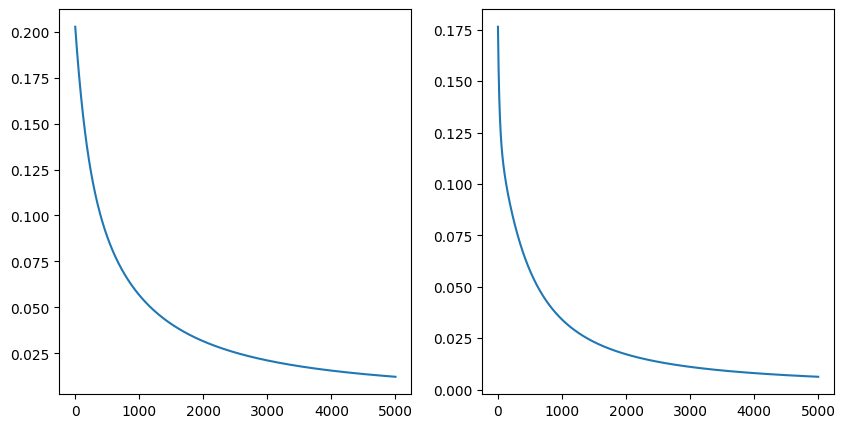

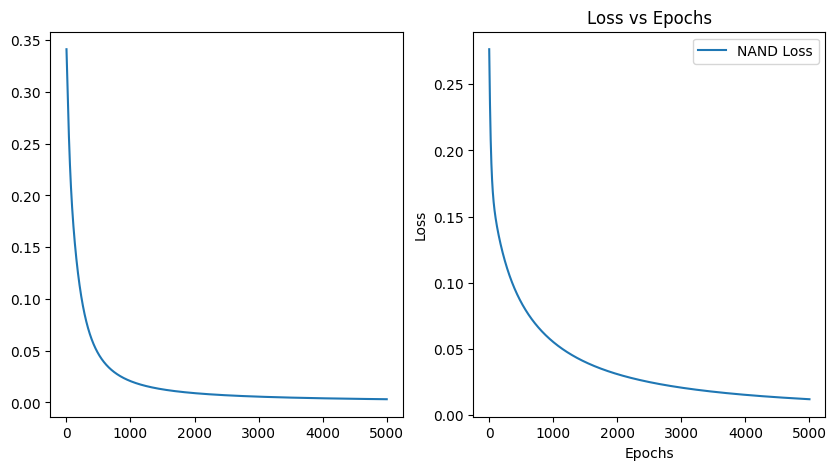

In [10]:

# Train and evaluate for AND
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
and_model = train_model("AND")
visualize_predictions(and_model, "AND")

# Train and evaluate for OR
plt.subplot(1, 2, 2)
or_model = train_model("OR")
visualize_predictions(or_model, "OR")

# Train and evaluate for NOT
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
not_model = train_model("NOT")
visualize_predictions(not_model, "NOT")

# Train and evaluate for NAND
plt.subplot(1, 2, 2)
nand_model = train_model("NAND")
visualize_predictions(nand_model, "NAND")

# Show loss plots
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()